# Tensorflow - Simple Demo

tensorflow 三部走 示范

学习函数：y = x1 + x2 + 1的系数

X: [1,2], y: [1,1], 激活:relu, 目标:(y' - y)^2

In [1]:
import tensorflow as tf
import numpy as np

### 准备数据

In [2]:
# y = x1 + x2 + 1 + epsilon

data_X = np.random.rand(100,2)
data_Y = np.sum(data_X,1) + 1.0
data_Y = [[x + 0.1 * np.random.randn()] for x in data_Y]

In [4]:
# split into training and testing
train_X = data_X[:90]
test_X = data_X[90:]
train_Y = data_Y[:90]
test_Y = data_Y[90:]

In [5]:
test_X

array([[0.96777725, 0.69245966],
       [0.59104686, 0.22316762],
       [0.66664888, 0.4387968 ],
       [0.37486494, 0.58931804],
       [0.26720765, 0.9761743 ],
       [0.45157517, 0.89284721],
       [0.9814972 , 0.90297677],
       [0.10828367, 0.29779825],
       [0.74274856, 0.34150646],
       [0.66867296, 0.84401877]])

In [6]:
test_Y

[[2.6607530946115703],
 [1.7115606422373633],
 [2.1570880146165186],
 [1.8321092411072528],
 [2.1465635402509893],
 [2.2826174082191146],
 [2.928477400091539],
 [1.3974654406360736],
 [2.124877356028229],
 [2.5425030179684276]]

### 定义

In [7]:
#定义constant
b = tf.constant(1, tf.float32)

In [8]:
b

<tf.Tensor 'Const:0' shape=() dtype=float32>

In [9]:
#定义Variable
initial_weight = tf.truncated_normal([2,1],stddev=1.0/np.sqrt(1))
W = tf.Variable(initial_weight)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32_ref>

In [11]:
#定义数据数据
X = tf.placeholder(tf.float32, shape = [None,2])
y_true = tf.placeholder(tf.float32, shape = [None,1])  

In [12]:
X

<tf.Tensor 'Placeholder:0' shape=(?, 2) dtype=float32>

In [13]:
y_true

<tf.Tensor 'Placeholder_1:0' shape=(?, 1) dtype=float32>

### 建模

In [14]:
u = tf.matmul(X, W) + b

In [15]:
u

<tf.Tensor 'add:0' shape=(?, 1) dtype=float32>

In [16]:
y = tf.nn.relu(u)

In [17]:
y

<tf.Tensor 'Relu:0' shape=(?, 1) dtype=float32>

In [20]:
test = y_true-y

In [21]:
test

<tf.Tensor 'sub_1:0' shape=(?, 1) dtype=float32>

In [22]:
test2 = tf.square(test)

In [23]:
test2

<tf.Tensor 'Square_1:0' shape=(?, 1) dtype=float32>

In [18]:
#objective function
J = tf.reduce_sum(tf.square(y_true-y)) 

In [19]:
J

<tf.Tensor 'Sum:0' shape=() dtype=float32>

In [24]:
#optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)

In [25]:
train = optimizer.minimize(J)

In [26]:
mse = tf.reduce_mean(tf.square(y_true-y)) 

In [27]:
mse

<tf.Tensor 'Mean:0' shape=() dtype=float32>

### 运行 

In [28]:
#开启一个session并初始化变量
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    loss_list, error_list = [], []
    
    #训练
    for i in range(2000):
        _, loss = sess.run([train, J], {X:train_X, y_true:train_Y})
        
        #每轮训练之后用测试集评价模型
        error = sess.run(mse, {X:test_X, y_true:test_Y})
        
        #记录loss和error
        loss_list.append(loss)
        error_list.append(error)
        
        #打印每轮的训练/评价结果
        if i % 100 == 0:
            print('iteration: %d, loss: %f, mse: %f' %(i, loss, error))
            
    #查看weight
    weight = sess.run(W) 
    print(weight)

iteration: 0, loss: 50.333469, mse: 0.404145
iteration: 100, loss: 12.623602, mse: 0.094026
iteration: 200, loss: 2.813533, mse: 0.022624
iteration: 300, loss: 0.969928, mse: 0.007118
iteration: 400, loss: 0.780575, mse: 0.004664
iteration: 500, loss: 0.769866, mse: 0.004284
iteration: 600, loss: 0.769534, mse: 0.004225
iteration: 700, loss: 0.769528, mse: 0.004217
iteration: 800, loss: 0.769528, mse: 0.004216
iteration: 900, loss: 0.769528, mse: 0.004216
iteration: 1000, loss: 0.769528, mse: 0.004216
iteration: 1100, loss: 0.769528, mse: 0.004216
iteration: 1200, loss: 0.769528, mse: 0.004216
iteration: 1300, loss: 0.769528, mse: 0.004216
iteration: 1400, loss: 0.769528, mse: 0.004216
iteration: 1500, loss: 0.769528, mse: 0.004216
iteration: 1600, loss: 0.769528, mse: 0.004216
iteration: 1700, loss: 0.769528, mse: 0.004216
iteration: 1800, loss: 0.769528, mse: 0.004216
iteration: 1900, loss: 0.769528, mse: 0.004216
[[1.0180275]
 [0.9706439]]


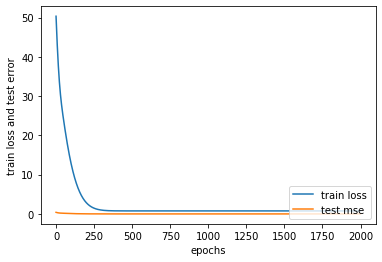

In [30]:
#画图

import pylab

pylab.plot(np.arange(len(loss_list)), loss_list, label='train loss')
pylab.plot(np.arange(len(error_list)), error_list, label='test mse')
    
pylab.xlabel('epochs')
pylab.ylabel('train loss and test error')
pylab.legend(loc='lower right')

pylab.show()